<h1>Titanic - O que os dados revelam?</h1>

<p>RMS Titanic é o nome de um famoso navio britânico projetado para ser o mais luxuoso e o mais seguro da sua época. Após 2 anos de construção, foi lançado ao mar em maio de 1911.</p>
<p>A viagem inaugurau do navio teve início no dia 10 de abril de 1912. Partindo da cidade inglesa de Southampton, passando ainda por Cherbourg-Ville, situada na França, e Queenstown, situada na Irlanda, o Titanic deveria chegar na cidade americana de Nova Iorque.</p>
<p>No entanto, o Titanic se chocou com um iceberg às 23h40 do dia 14 de abril de 1912 e naufragou, deixando 1514 mortos, segundo a Junta Comercial Britânica.</p>
<p>Fonte: <a href="https://pt.wikipedia.org/wiki/RMS_Titanic">Wikipédia</a></p>

<img src="titanic.jpg">

<h2>Verificação dos Dados</h2>

<p>Os dados utilizados neste projeto estão disponíveis na plataforma Kaggle de forma gratuita <a href="https://www.kaggle.com/c/titanic/data?select=train.csv">neste link</a></p>
<p>Nesta etapa do projeto os dados serão observados a fim de conhecer mais sobre eles. Serão verificados quantas features o dataset possui, quais os tipos dos dados, a quantidade total de registros, para que seja possível gerar alguns insights que nortearão o estudo.</p>

<p>O primeiro passo é importar as bibliotecas que serão utilizadas:</p>
<ul>
    <li>Numpy: </li>
    <li>Pandas: </li>
    <li>Matplotlib: </li>
    <li>Seaborn: </li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<p>O próximo passo será importar o dataset e fazer o reconhecimento dos dados</p>

In [2]:
titanic = pd.read_csv("train.csv")

In [3]:
print("O dataset possui o seguinte formato (shape): ")
print("{} linhas".format(titanic.shape[0]))
print("{} colunas".format(titanic.shape[1]))

O dataset possui o seguinte formato (shape): 
891 linhas
12 colunas


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p>Após a verificação das 5 primeiras linhas do dataset, é possível identificar que tipos de dados as colunas indicam, mas ainda não é possível saber todas as categorias existentes. Por exemplo, a coluna Parch tem valores diferentes de 0? Ou a colunas Embarked possui outros valores além de S e C? O método value_counts() permitirá identificar quais categorias de dados temos nas colunas onde tal informação não é está explicita no trecho anterior.</p>

In [6]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<p>Agora é possível afirmar, com certeza, o que cada coluna representa:</p> 
<ul>
    <li>PassengerId: id do passageiro</li>
    <li>Survived: se o passageiro sobreviveu (valor 1) ou não sobreviveu (valor 0)</li>
    <li>Pclass: a classe em que o passageiro viajou, sendo 1 para primeira classe, 2 para segunda e 3 para terceira classe</li>
    <li>Name: nome do passageiro</li>
    <li>Sex: sexo do passageiro</li>
    <li>Age: idade do passageiro</li>
    <li>SibSp: pela abreviatura representa Siblings/Spouse (irmãos - filhos do mesmo pai e mesma mãe/cônjuge) em relação ao passageiro</li>
    <li>Parch: pela abreviatura representa Parent/Child, que significa os pais e as crianças (filhos) em relação ao passageiro</li>
    <li>Ticket: número da passagem</li>
    <li>Fare: taxa paga para embarcar</li>
    <li>Cabin: cabine onde o passageiro viajou</li>
    <li>Embarked: representa a cidade onde o passageiro embarcou. Como o navio saiu de Southampton, passou por Cherbourg-Ville e Queenstown, as letras S, C e Q correspondem a cada uma destas cidades</li>
</ul>

<h2>Transformações e Tratamentos dos Dados</h2>

<p>Acredito ser importante fazer algumas transformações nos dados antes de prosseguir com o estudo</p>
<p>Nesta etapa, serão feitas transformações nos nomes das colunas e na forma como alguns dados são apresentados, além de tratamentos de valores faltantes e possíveis valores discrepantes</p>

<p>O primeiro passo é a alteração dos nomes das colunas</p>

In [11]:
novas_colunas = ['Id_Passageiro', 'Sobreviveu?', 'Classe', 'Nome', 'Sexo', 'Idade', 'Irmãos/Cônjuge', 'Pais/Filhos', 'Passagem', 'Taxa_Embarque', 'Cabine', 'Cidade_Embarque']
titanic.columns = novas_colunas

In [12]:
titanic.head()

,Id_Passageiro,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Filhos,Passagem,Taxa_Embarque,Cabine,Cidade_Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p>As colunas renomeadas representam:</p> 
<ul>
    <li>Id_Passageiro: id do passageiro</li>
    <li>Sobreviveu?: se o passageiro sobreviveu (valor 1) ou não sobreviveu (valor 0)</li>
    <li>Classe: a classe em que o passageiro viajou, sendo 1 para primeira classe, 2 para segunda e 3 para terceira classe</li>
    <li>Nome: nome do passageiro</li>
    <li>Sexo: sexo do passageiro</li>
    <li>Idade: idade do passageiro</li>
    <li>Irmãos/Cônjuge	: pela abreviatura representa Siblings/Spouse (irmãos - filhos do mesmo pai e mesma mãe/cônjuge) em relação ao passageiro</li>
    <li>Pais/Filhos: pela abreviatura representa Parent/Child, que significa os pais e as crianças (filhos) em relação ao passageiro</li>
    <li>Passagem: número da passagem</li>
    <li>Taxa_Embarque: taxa paga para embarcar</li>
    <li>Cabine: cabine onde o passageiro viajou</li>
    <li>Cidade_Embarque: representa a cidade onde o passageiro embarcou. Como o navio saiu de Southampton, passou por Cherbourg-Ville e Queenstown, as letras S, C e Q correspondem a cada uma destas cidades</li>
</ul>

<p>Agora o nome das colunas ficou mais intuitivo.</p>
<p>O segundo passo é a busca por valores faltantes e valores discrepantes.</p>

In [13]:
titanic.isna()

,Id_Passageiro,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Filhos,Passagem,Taxa_Embarque,Cabine,Cidade_Embarque
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<p>Observando o retorno do método isna(), faltam dados apenas na coluna Cabine</p>
<p>O método describe() permitirá identificar, de forma rápida, informações sobre as colunas que possuem dados numéricos</p>

In [14]:
titanic.describe()

,Id_Passageiro,Sobreviveu?,Classe,Idade,Irmãos/Cônjuge,Pais/Filhos,Taxa_Embarque
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<p>Não foi possível tirar conclusões sobre dados faltantes com o retorno do método describe(). Não foram encontrados nenhum valor discrepante</p>
<p>Vou aplicar o método isna(), combinado com value_counts(), a cada coluna aparentemente relevante para extração de algum insight, para uma análise mais precisa</p>

In [15]:
titanic['Sobreviveu?'].isna().value_counts()

False    891
Name: Sobreviveu?, dtype: int64

In [16]:
titanic['Classe'].isna().value_counts()

False    891
Name: Classe, dtype: int64

In [17]:
titanic['Nome'].isna().value_counts()

False    891
Name: Nome, dtype: int64

In [18]:
titanic['Sexo'].isna().value_counts()

False    891
Name: Sexo, dtype: int64

In [19]:
titanic['Idade'].isna().value_counts()

False    714
True     177
Name: Idade, dtype: int64

In [20]:
titanic['Irmãos/Cônjuge'].isna().value_counts()

False    891
Name: Irmãos/Cônjuge, dtype: int64

In [21]:
titanic['Pais/Filhos'].isna().value_counts()

False    891
Name: Pais/Filhos, dtype: int64

In [22]:
titanic['Passagem'].isna().value_counts()

False    891
Name: Passagem, dtype: int64

In [23]:
titanic['Taxa_Embarque'].isna().value_counts()

False    891
Name: Taxa_Embarque, dtype: int64

In [24]:
titanic['Cabine'].isna().value_counts()

True     687
False    204
Name: Cabine, dtype: int64

In [25]:
titanic['Cidade_Embarque'].isna().value_counts()

False    889
True       2
Name: Cidade_Embarque, dtype: int64

<p>É possível afirmar, com certeza, que faltam dados em apenas três colunas: Idade, Cabine, Cidade_Embarque</p>
<p>Chama atenção a quantidade de pessoas sem idade registrada, que é 177. Quantas destas pessoas sobreviveram?</p>

In [26]:
idade_ausente = titanic[titanic['Idade'].isna() == True][['Nome','Sobreviveu?']]

In [27]:
idade_ausente['Sobreviveu?'].value_counts()

0    125
1     52
Name: Sobreviveu?, dtype: int64

<p>Das pessoas cuja idade não foi informada, 52 sobreviveram e 125 não</p>
<p>Acredito que excluir a coluna idade não seria uma boa ideia, pois ela pode ser usada para ajudar a extrair algum  insight. Não acredito que substituir os dados faltantes pela média de idade seja também uma boa alternativa, visto que são muitas pessoas para as quais a idade não foi registrada. Substituir os valores faltantes por zero não causará nenhum impacto negativo no dataset, logo tal ação será tomada a seguir</p>

In [28]:
titanic['Idade'].fillna(value=0, inplace=True)

In [29]:
titanic['Idade'].isna().value_counts()

False    891
Name: Idade, dtype: int64

<p>Os dados faltantes na coluna Cabine não causarão impacto nas análises. Já a coluna Cidade_Embarque também possui dados faltantes, mas também não causará grande impacto na análise pelo fato de ser apenas 2 registros para os quais a cidade não foi mencionada</p>

<p>O terceiro passo é fazer transformações na forma como os dados são apresentados</p>

In [30]:
titanic.head()

,Id_Passageiro,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Filhos,Passagem,Taxa_Embarque,Cabine,Cidade_Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p>Analisando os dados por meio do método head(), é perceptível que é muito mais intuitivo na coluna "Sobreviveu?" trocar 0 e 1 para Não e Sim, respectivamente. Na coluna Sexo os valores male e female podem ser trocados para Masculino e Feminino, respectivamente. Já a coluna Cidade_Embarque também pode ter os dados alterados de S para Southampton, de C para Cherbourg-Ville e de Q para Queenstown</p>

In [31]:
titanic['Sobreviveu?'] = titanic['Sobreviveu?'].replace([0,1], ['Não','Sim'])

In [32]:
titanic['Sexo'] = titanic['Sexo'].replace(['male', 'female'], ['Masculino', 'Feminino'])

In [33]:
titanic['Cidade_Embarque'] = titanic['Cidade_Embarque'].replace(['S','C','Q'], ['Southampton', 'Cherbourg-Ville', 'Queenstown'])

In [34]:
titanic.head()

,Id_Passageiro,Sobreviveu?,Classe,Nome,Sexo,Idade,Irmãos/Cônjuge,Pais/Filhos,Passagem,Taxa_Embarque,Cabine,Cidade_Embarque
0,1,Não,3,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Sim,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,PC 17599,71.2833,C85,Cherbourg-Ville
2,3,Sim,3,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Sim,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,113803,53.1000,C123,Southampton
4,5,Não,3,"Allen, Mr. William Henry",Masculino,35.0,0,0,373450,8.0500,NaN,Southampton


<p>A apresentação dos dados após a alteração deixa muito mais intuitiva tanto a análise dos dados quanto o entendimento do projeto</p>

<h2>Extração de Insights</h2>

<p>O presente estudo busca responder as seguintes perguntas:</p>
<ul>
    <li>Tinham mais mulheres ou mais homens a bordo?</li>
    <li>Quantas pessoas sobreviveram e quantas pessoas morreram?</li>
    <li>Listar as quantidades de pessoas que sobreviveram e que morreram por cidade de embarque</li>
    <li>A quantidade de passageiros do sexo feminino que sobreviveram é maior do que os passageiros do sexo masculino?</li>
    <li>Qual a classe teve mais sobreviventes?</li>
    <li>A classe teve influência na sobrevivência?</li>
</ul>

<h3>Tinham mais mulheres ou mais homens a bordo?</h3>

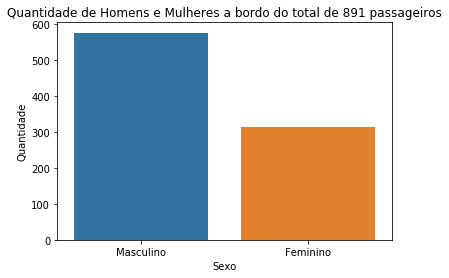

In [35]:
sns.countplot(x='Sexo', data=titanic)
plt.title("Quantidade de Homens e Mulheres a bordo do total de {} passageiros".format(titanic.shape[0]))
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.show()

<p>Observa-se que tinham mais homens a bordo do que mulheres</p>

<h3>Quantas pessoas sobreviveram e quantas pessoas morreram?</h3>

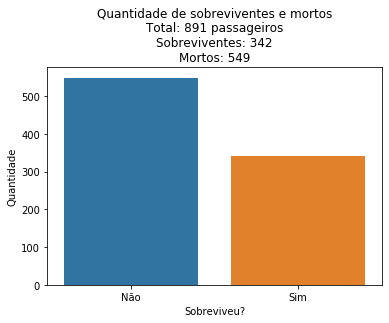

In [36]:
sns.countplot(x='Sobreviveu?', data=titanic)
sobreviventes = sum(titanic['Sobreviveu?'] == 'Sim')
mortos = sum(titanic['Sobreviveu?'] == 'Não')

plt.title("Quantidade de sobreviventes e mortos\nTotal: {} passageiros\nSobreviventes: {}\nMortos: {}".format(titanic.shape[0], sobreviventes, mortos))
plt.xlabel("Sobreviveu?")
plt.ylabel("Quantidade")
plt.show()

<p>Dentre os 891 passageiros, 342 sobreviveram e 549 morreram</p>

<h3>Listar as quantidades de pessoas que sobreviveram e que morreram por cidade de embarque</h3>

In [37]:
print("Cidades onde as pessoas que sobreviveram embarcaram: ")
titanic[titanic['Sobreviveu?']=='Sim']['Cidade_Embarque'].value_counts()

Cidades onde as pessoas que sobreviveram embarcaram: 


Southampton        217
Cherbourg-Ville     93
Queenstown          30
Name: Cidade_Embarque, dtype: int64

In [38]:
print("Cidades onde as pessoas que morreram embarcaram: ")
titanic[titanic['Sobreviveu?']=='Não']['Cidade_Embarque'].value_counts()

Cidades onde as pessoas que morreram embarcaram: 


Southampton        427
Cherbourg-Ville     75
Queenstown          47
Name: Cidade_Embarque, dtype: int64

<p>A maior parte das pessoas que sobreviveram embarcaram em Southampton, assim como a maior parte das pessoas que morreram. Logo, a maioria das pessoas a bordo do Titanic embarcaram na cidade inglesa.</p>

<h3>A quantidade de passageiros do sexo feminino que sobreviveram é maior do que os passageiros do sexo masculino?</h3>

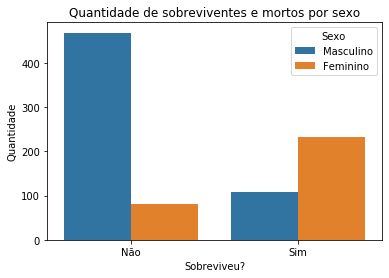

In [39]:
sns.countplot(x='Sobreviveu?', hue='Sexo', data=titanic)

plt.title("Quantidade de sobreviventes e mortos por sexo".format(titanic.shape[0]))
plt.xlabel("Sobreviveu?")
plt.ylabel("Quantidade")
plt.show()

<p>Parece que o costume de salvar primeiro mulheres e crianças em catástrofes prevaleceu, pois apesar de ter mais homens a bordo, a maior parte dos sobreviventes são mulheres</p>

<h3>Qual a classe teve mais sobreviventes?</h3>

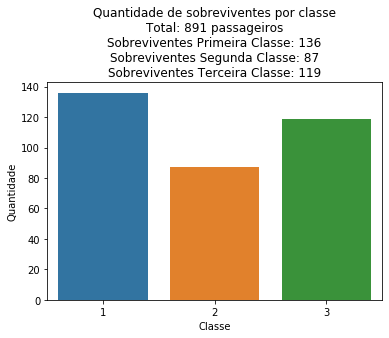

In [73]:
sobreviveu_primeira = titanic[(titanic['Classe'] == 1) & (titanic['Sobreviveu?'] == 'Sim')][['Sobreviveu?', 'Classe']]
sobreviveu_segunda = titanic[(titanic['Classe'] == 2) & (titanic['Sobreviveu?'] == 'Sim')][['Sobreviveu?', 'Classe']]
sobreviveu_terceira = titanic[(titanic['Classe'] == 3) & (titanic['Sobreviveu?'] == 'Sim')][['Sobreviveu?', 'Classe']]
sobreviveu_classe = pd.concat([sobreviveu_primeira, sobreviveu_segunda, sobreviveu_terceira])

sns.countplot(x='Classe', data=sobreviveu_classe)
primeira = sobreviveu_classe[sobreviveu_classe['Classe'] == 1].count()[0]
segunda = sobreviveu_classe[sobreviveu_classe['Classe'] == 2].count()[0]
terceira = sobreviveu_classe[sobreviveu_classe['Classe'] == 3].count()[0]


plt.title("Quantidade de sobreviventes por classe\nTotal: {} passageiros\nSobreviventes Primeira Classe: {}\nSobreviventes Segunda Classe: {}\nSobreviventes Terceira Classe: {}".format(titanic.shape[0], primeira, segunda, terceira))
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.show()

<p>Já vimos que primeira classe teve mais sobreviventes que as demais, contando com o número de 136, contra 87 na segunda e 119 na terceira. As quantidades de sobreviventes por classe vão nos ajudar a responder a próxima pergunta.</p>

<h3>A classe teve influência na sobrevivência?</h3>

Sobreviventes:
Primeira Classe: 136
Segunda Classe: 87
Terceira Classe: 119

Mortos:
Primeira Classe: 80
Segunda Classe: 97
Terceira Classe: 372


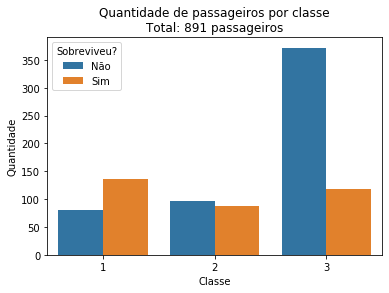

In [78]:
classe_total = titanic[['Sobreviveu?', 'Classe']]
sns.countplot(x='Classe', hue='Sobreviveu?', data=classe_total)

# Já temos a quantidade de sobreviventes nas classes, obtida na resposta da pergunta anterior, disponíveis nos seguintes dataframes:
# primeira, segunda, terceira
morto_primeira = classe_total[(classe_total['Classe'] == 1) & (classe_total['Sobreviveu?'] == 'Não')].count()[0]
morto_segunda = classe_total[(classe_total['Classe'] == 2) & (classe_total['Sobreviveu?'] == 'Não')].count()[0]
morto_terceira = classe_total[(classe_total['Classe'] == 3) & (classe_total['Sobreviveu?'] == 'Não')].count()[0]

print("Sobreviventes:\nPrimeira Classe: {}\nSegunda Classe: {}\nTerceira Classe: {}\n".format(primeira, segunda, terceira))
print("Mortos:\nPrimeira Classe: {}\nSegunda Classe: {}\nTerceira Classe: {}".format(morto_primeira, morto_segunda, morto_terceira))
plt.title("Quantidade de passageiros por classe\nTotal: {} passageiros".format(titanic.shape[0]))
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.show()

<p>A partir dos dados apurados, tudo indica que os passageiros da primeira classe foram foram favorecidos. Surge aqui uma nova pergunta: será que os passageiros da primeira classe sobreviventes eram, em sua maioria, mulheres, haja vista que são as primeiras a serem salvas em catástrofes?</p>

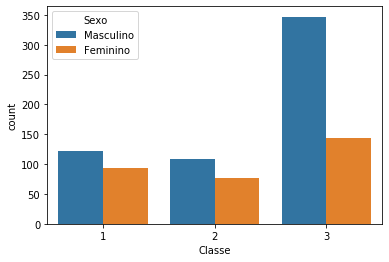

In [83]:
sns.countplot(x='Classe', hue='Sexo', data=titanic)

<p>Em todas as classes do Titanic tinham mais homens do que mulheres a bordo.</p>

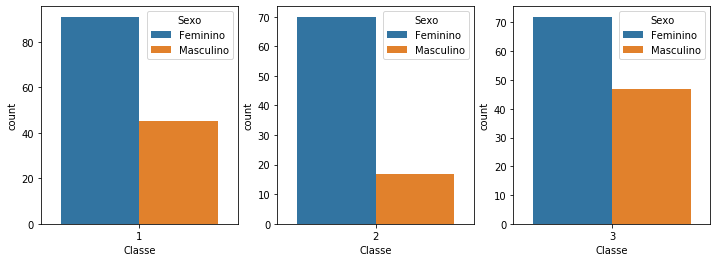

In [94]:
primeira_classe = titanic[(titanic['Classe']==1) & (titanic['Sobreviveu?']=='Sim')][['Classe', 'Sexo', 'Sobreviveu?']]
segunda_classe = titanic[(titanic['Classe']==2) & (titanic['Sobreviveu?']=='Sim')][['Classe', 'Sexo', 'Sobreviveu?']]
terceira_classe = titanic[(titanic['Classe']==3) & (titanic['Sobreviveu?']=='Sim')][['Classe', 'Sexo', 'Sobreviveu?']]

plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1)
sns.countplot(x='Classe', hue='Sexo', data=primeira_classe)
plt.subplot(1, 3, 2)
sns.countplot(x='Classe', hue='Sexo', data=segunda_classe)
plt.subplot(1, 3, 3)
sns.countplot(x='Classe', hue='Sexo', data=terceira_classe)

<p>A quantidade de mulheres que sobreviveram foi, realmente, maior do que a quantidade de homens sobreviventes por classe</p>
<p>Em resposta a pergunta inicial, os dados indicam que sim, a classe teve grande influência na sobrevivência dos passageiros. Embora a maior parte dos passageiros se encontrassem na terceira classe, a maioria dos sobreviventes daquela classe foi menor do que da primeira classe. As pessoas mais ricas foram favorecidas na hora do salvamento.</p>

<h2>Conclusões</h2>

<p>Este estudo não é definitivo, sendo passível de revisão no futuro.</p>
<p>Os resultados trouxeram à tona o fato de um número maior de mulheres ter sobrevivido. Isso é comum, uma vez que em catástrofes, as mulheres e as crianças têm prioridade quanto ao salvamento. Porém, além da alta quantidade de mortos na tragédia do Titanic, que é um triste acontecimento, tivemos outro triste indicador: a classe social parece ter sido fator decisivo para a sobrevivência.</p>